# Basic usage

The `nested_grid_plotter` is a [matplotlib](https://matplotlib.org/) wrapper that provides an easy way to create highly customizable plotters with complex grid layout, while offering some safety and a nice interface to access `Axes` and `SubFigures`.

This tutorial requires to know the basics of [matplotlib](https://matplotlib.org/).

Everything doable with matplotlib is doable with this plotter, i.e., the purpose of this library is to simplify some complex operations and to avoid code duplication. All figures can be produced without this library, that is to say with [matplotlib](https://matplotlib.org/) alone.

Let's start by importing the modules that we need.

In [1]:
import copy
import tempfile  # to save temporary images
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import nested_grid_plotter as ngp  # import the namespace
import numpy as np
from IPython.display import Image

Check the versions being used:

In [2]:
print(f"matplotlib version = {mpl.__version__}")
print(f"nested_grid_plotter version = {ngp.__version__}")
print(f"numpy version = {np.__version__}")

matplotlib version = 3.10.1
nested_grid_plotter version = 2.0.0
numpy version = 2.3.3


To display the figure inline in this jupyter notebook, let's run:

In [3]:
%matplotlib inline

Let's also apply some basic parameters for our figure so it looks nice.

In [4]:
new_rc_params = {
    "font.size": 16,
    "figure.figsize": (8, 8),
    "figure.facecolor": "w",
    "savefig.facecolor": "w",
    "savefig.edgecolor": "k",
    "savefig.dpi": 300,
}
plt.rcParams.update(new_rc_params)

Let's define a utility to print dictionaries nicely:

In [5]:
import json


def dict_pretty_print(my_name, my_dict):
    """Pretty print the input dict."""
    print(f"{my_name} = ", json.dumps(my_dict, indent=4, sort_keys=True, default=str))

The creation of a plotter requires only two optional arguments. 

* Parameters: 
    - **fig: Figure** : An instance of `matplotlib.figure.Figure`.
    - **builder: ** : Parameters for `matplotlib.figure.Figure.subfigures`.
    
TIPS: You can also have a look at the initializer documentation if you don't remember (`help(NestedGridPlotter.__init__)`).

Let's now create a versy simple plot, without passing any arguments to the plotter:

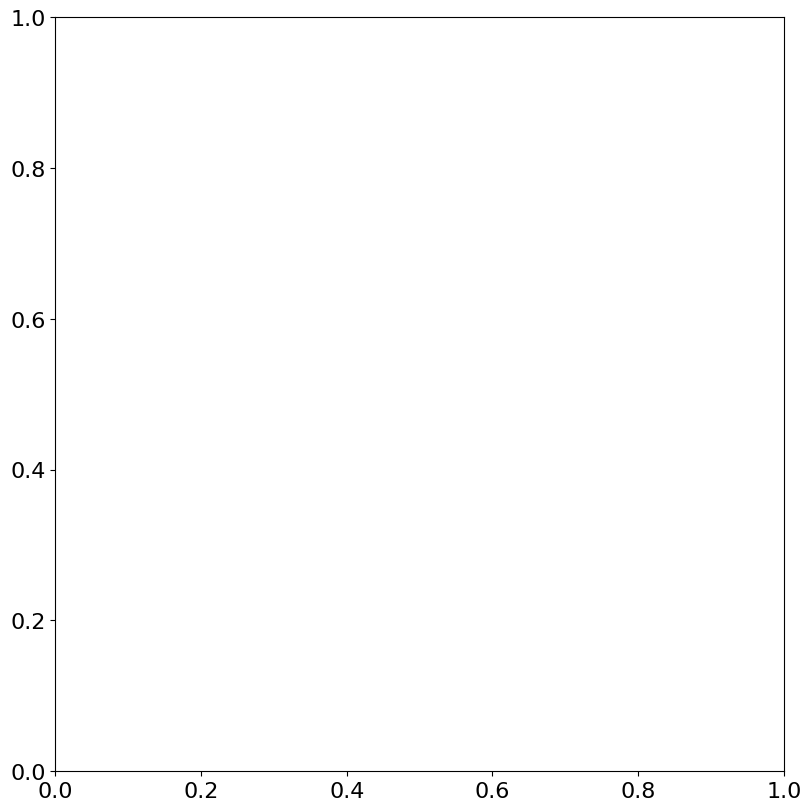

In [6]:
plotter = ngp.NestedGridPlotter()

The instance has five main public attributes:
- `plotter.fig`
- `plotter.grouped_sf_dict`
- `plotter.grouped_ax_dict`
- `plotter.sf_dict`
- `plotter.ax_dict`
- `plotter.axes`

Note that by default, the subfigure is name "fig11" and the axis "ax11".

In [7]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.groued_sf_dict", plotter.grouped_sf_dict)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter._dict", plotter.ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.groued_sf_dict =  {}
plotter.grouped_ax_dict =  {
    "fig": {
        "ax1-1": "Axes(0.0617365,0.0423615;0.910945x0.94243)"
    }
}
plotter._dict =  {
    "ax1-1": "Axes(0.0617365,0.0423615;0.910945x0.94243)"
}
plotter.ax_dict =  {
    "ax1-1": "Axes(0.0617365,0.0423615;0.910945x0.94243)"
}


To plot some random data, simply use the classic `matplotlib` interface. Remember we just use a wrapper.

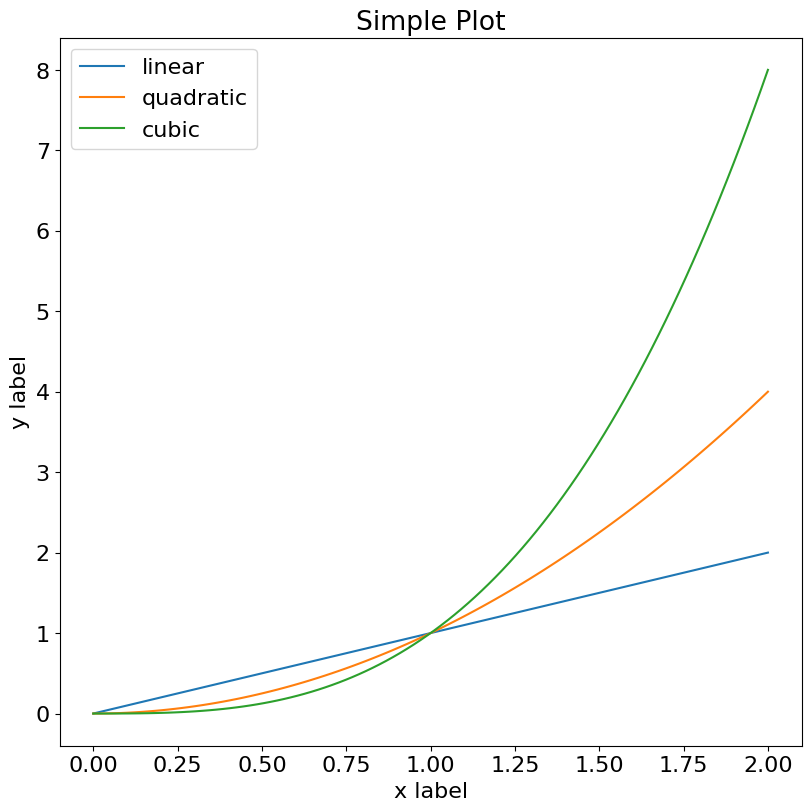

In [8]:
x = np.linspace(0, 2, 100)  # Sample data.
ax = plotter.ax_dict["ax1-1"]
ax.plot(x, x, label="linear")
ax.plot(x, x**2, label="quadratic")
ax.plot(x, x**3, label="cubic")
ax.set_xlabel("x label")  # Add an x-label to the axes.
ax.set_ylabel("y label")  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()
# Add a legend.
plotter.fig

## Creating nested plots

This is where the plotter wrapper starts to be useful. We now want to create a 2x3 figure:

/home/acollet/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


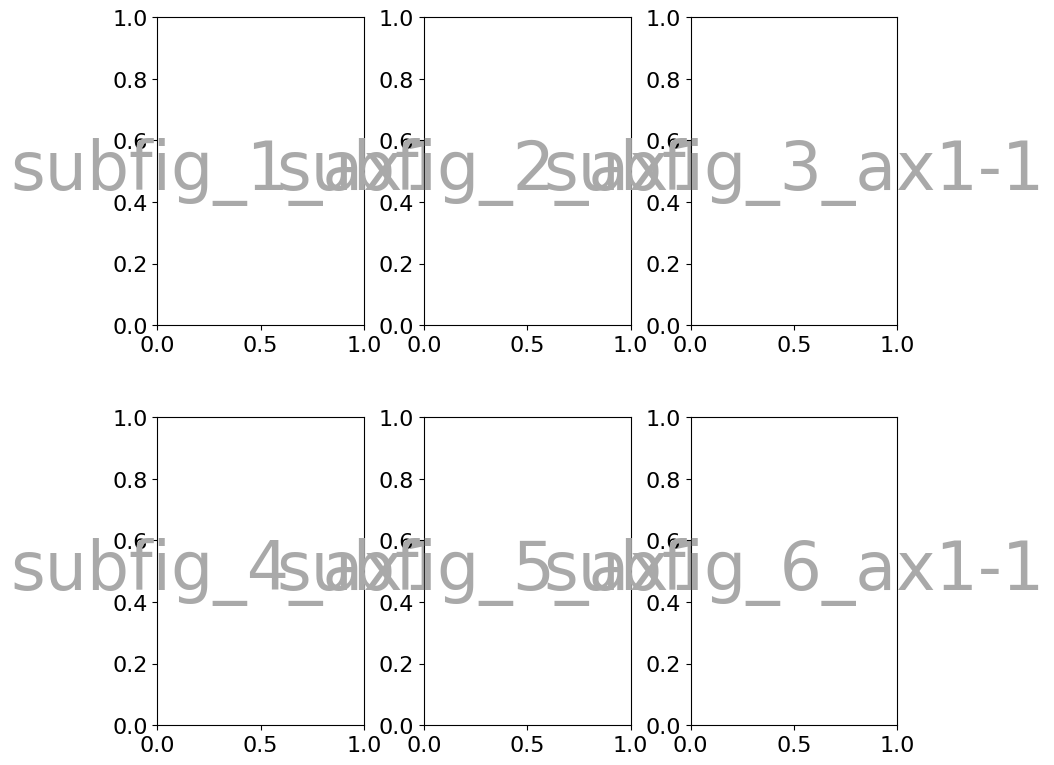

In [9]:
plotter = ngp.NestedGridPlotter(
    ngp.Figure(constrained_layout=True),  # Always use this to prevent overlappings
    builder=ngp.SubfigsBuilder(nrows=2, ncols=3),
)
plotter.identify_axes()  # Helper to add the name of the axis on the plot
plotter.fig

However note that it results in the creation of 6 subfigures. Figures are named `"fig{i}{j}"` and axes `"ax{i}{j}"`, where `i` and `j` are the row and column numbers respectively.

In [10]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.groued_sf_dict", plotter.grouped_sf_dict)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.groued_sf_dict =  {
    "fig": {
        "subfig_1": "<matplotlib.figure.SubFigure object at 0x7f06bc8d7810>",
        "subfig_2": "<matplotlib.figure.SubFigure object at 0x7f06bc8dc510>",
        "subfig_3": "<matplotlib.figure.SubFigure object at 0x7f06bc8b9c10>",
        "subfig_4": "<matplotlib.figure.SubFigure object at 0x7f06bc8dba90>",
        "subfig_5": "<matplotlib.figure.SubFigure object at 0x7f06bc8e58d0>",
        "subfig_6": "<matplotlib.figure.SubFigure object at 0x7f06bc8e7510>"
    }
}
plotter.grouped_ax_dict =  {
    "subfig_1": {
        "subfig_1_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_2": {
        "subfig_2_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_3": {
        "subfig_3_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_4": {
        "subfig_4_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_5": {
        "subfig_5_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_6": {

In [11]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.groued_sf_dict", plotter.grouped_sf_dict)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.groued_sf_dict =  {
    "fig": {
        "subfig_1": "<matplotlib.figure.SubFigure object at 0x7f06bc8d7810>",
        "subfig_2": "<matplotlib.figure.SubFigure object at 0x7f06bc8dc510>",
        "subfig_3": "<matplotlib.figure.SubFigure object at 0x7f06bc8b9c10>",
        "subfig_4": "<matplotlib.figure.SubFigure object at 0x7f06bc8dba90>",
        "subfig_5": "<matplotlib.figure.SubFigure object at 0x7f06bc8e58d0>",
        "subfig_6": "<matplotlib.figure.SubFigure object at 0x7f06bc8e7510>"
    }
}
plotter.grouped_ax_dict =  {
    "subfig_1": {
        "subfig_1_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_2": {
        "subfig_2_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_3": {
        "subfig_3_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_4": {
        "subfig_4_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_5": {
        "subfig_5_ax1-1": "Axes(0.125,0.11;0.775x0.77)"
    },
    "subfig_6": {

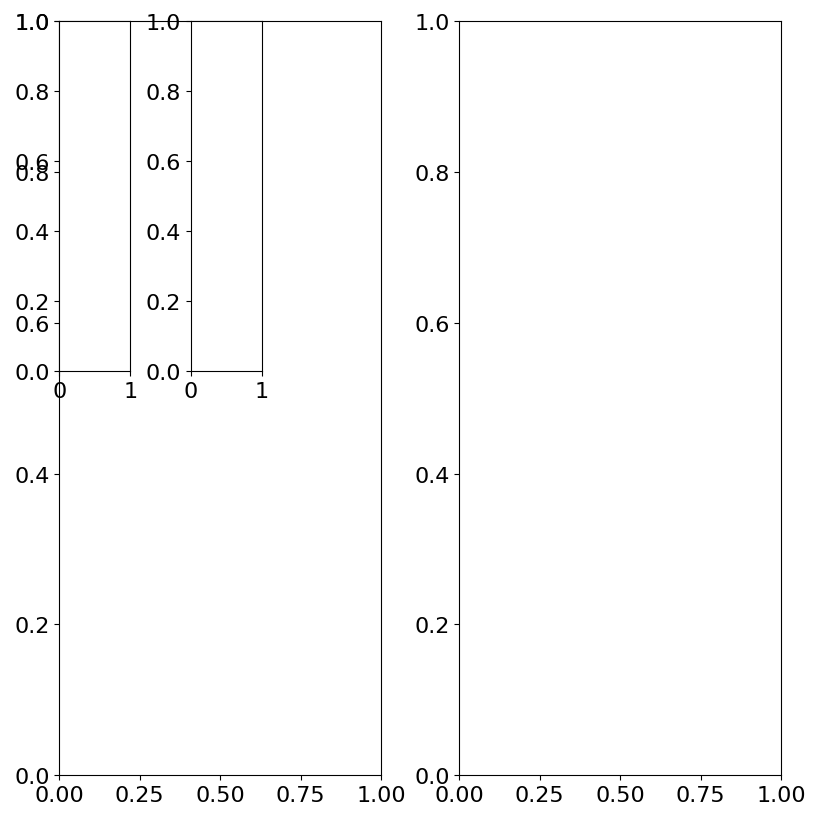

In [12]:
# Create a figure
fig = ngp.Figure(constrained_layout=True)
# Add 6 subfigures
fig.subfigures(nrows=2, ncols=3)
# And add a subplot to the first subfigure
fig.subfigs[0].subplot_mosaic([["C", "D"]])
# And add two subplots to the main figure
fig.subplot_mosaic([["C", "D"]])

# This causes overlapping
fig

To obtain the same result but with a unique subfigure, we need to use the `subplots_mosaic_params`.

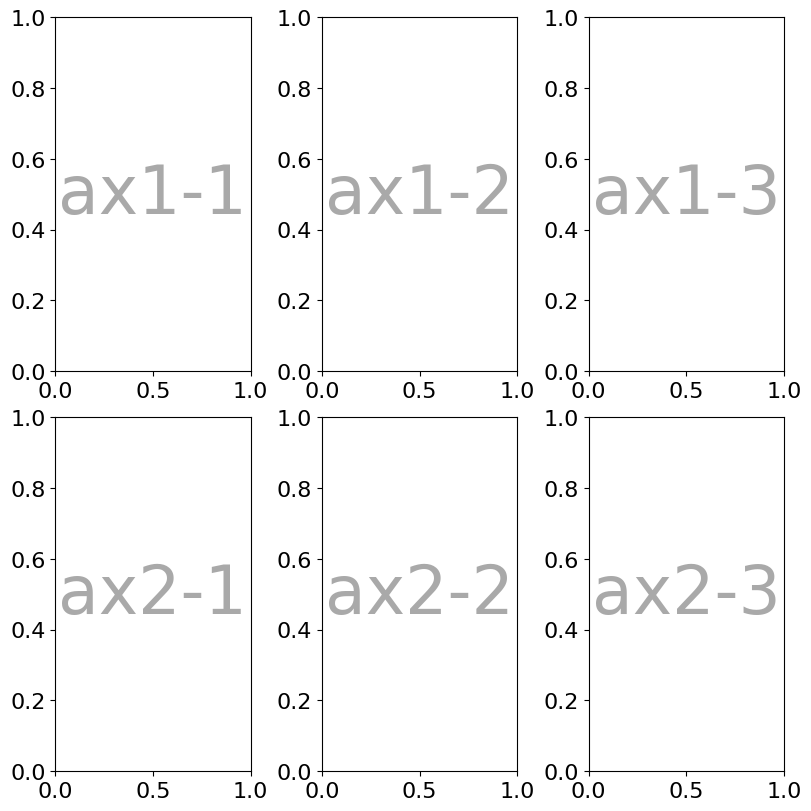

In [13]:
plotter = ngp.NestedGridPlotter(
    fig=ngp.Figure(constrained_layout=True),  # Always use this to prevent overlappings
    builder=ngp.SubplotsMosaicBuilder(
        mosaic=[["ax1-1", "ax1-2", "ax1-3"], ["ax2-1", "ax2-2", "ax2-3"]]
    ),
)
plotter.identify_axes()  # Helper to add the name of the axis on the plot
plotter.fig

In [14]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.groued_sf_dict", plotter.grouped_sf_dict)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(800x800)"
plotter.groued_sf_dict =  {}
plotter.grouped_ax_dict =  {
    "fig": {
        "ax1-1": "Axes(0.0617365,0.542362;0.244279x0.44243)",
        "ax1-2": "Axes(0.39507,0.542362;0.244279x0.44243)",
        "ax1-3": "Axes(0.728403,0.542362;0.244279x0.44243)",
        "ax2-1": "Axes(0.0617365,0.0423615;0.244279x0.44243)",
        "ax2-2": "Axes(0.39507,0.0423615;0.244279x0.44243)",
        "ax2-3": "Axes(0.728403,0.0423615;0.244279x0.44243)"
    }
}
plotter.ax_dict =  {
    "ax1-1": "Axes(0.0617365,0.542362;0.244279x0.44243)",
    "ax1-2": "Axes(0.39507,0.542362;0.244279x0.44243)",
    "ax1-3": "Axes(0.728403,0.542362;0.244279x0.44243)",
    "ax2-1": "Axes(0.0617365,0.0423615;0.244279x0.44243)",
    "ax2-2": "Axes(0.39507,0.0423615;0.244279x0.44243)",
    "ax2-3": "Axes(0.728403,0.0423615;0.244279x0.44243)"
}


We can now combine the two and customize the subfigures independenlty. `subplots_mosaic_params` is a dictionary that takes subfigure names as keys and dict arguments for `matplotlib.figure.Figure.subplot_mosaic` with an extra keyword `mosaic` to indicate the first positional argument expected by `matplotlib.figure.Figure.subplot_mosaic`.

In this case, we decided both of how figures and axes are named. For convenience in the following example, we use *l = left, r = right, b = bottom ...*.

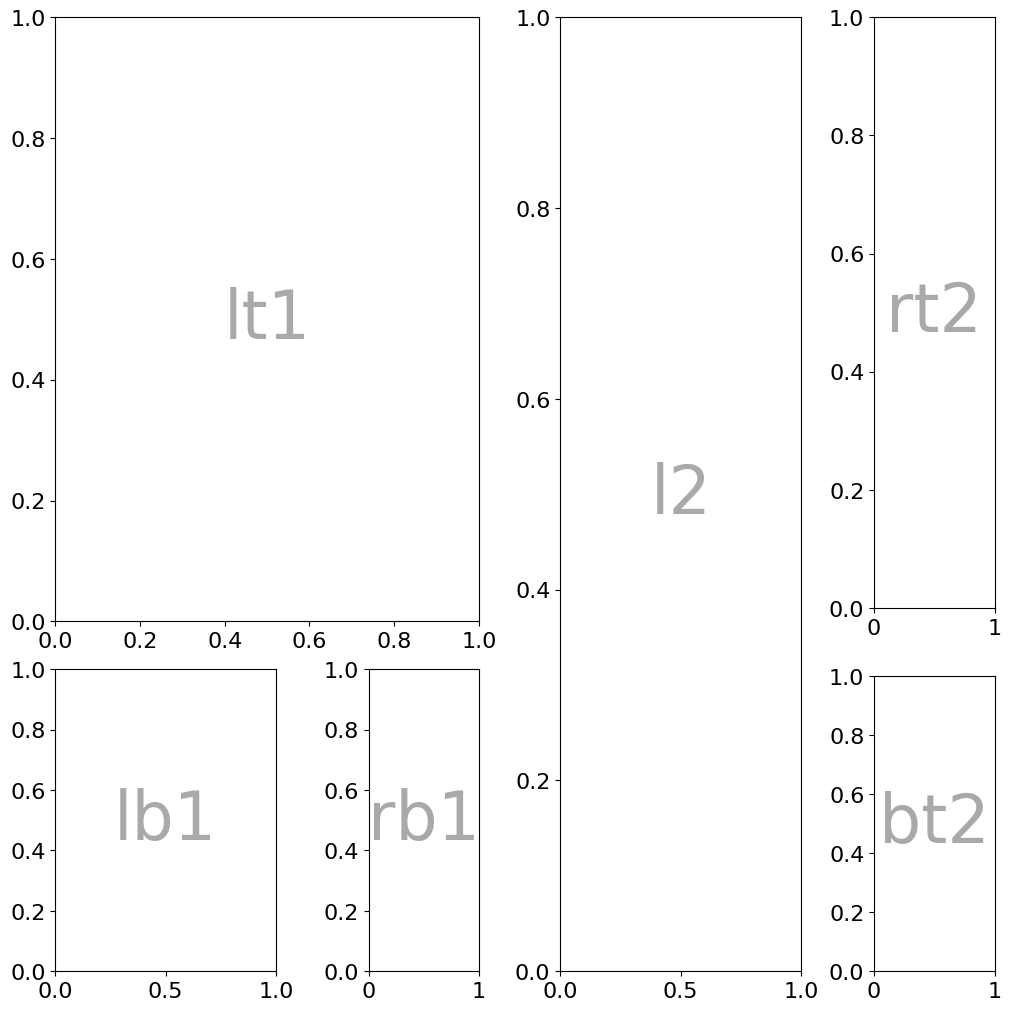

In [15]:
plotter = ngp.NestedGridPlotter(
    ngp.Figure(
        constrained_layout=True,  # Always use this to prevent overlappings
        figsize=(10, 10),
    ),
    builder=ngp.SubfigsBuilder(
        nrows=1,
        ncols=2,
        sub_builders={
            "the_left_sub_figure": ngp.SubplotsMosaicBuilder(
                mosaic=[["lt1", "lt1"], ["lb1", "rb1"]],
                gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
                sharey=False,
            ),
            "the_right_sub_figure": ngp.SubplotsMosaicBuilder(
                mosaic=[["l2", "rt2"], ["l2", "bt2"]],
                gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
                sharey=False,
            ),
        },
    ),
)
plotter.identify_axes()  # Helper to add the name of the axis on the plot
plotter.fig

We now have two subfigures each having 3 subplots:

In [16]:
dict_pretty_print("plotter.fig", plotter.fig)
dict_pretty_print("plotter.groued_sf_dict", plotter.grouped_sf_dict)
dict_pretty_print("plotter.grouped_ax_dict", plotter.grouped_ax_dict)
dict_pretty_print("plotter.ax_dict", plotter.ax_dict)

plotter.fig =  "Figure(1000x1000)"
plotter.groued_sf_dict =  {
    "fig": {
        "the_left_sub_figure": "<matplotlib.figure.SubFigure object at 0x7f06b88db410>",
        "the_right_sub_figure": "<matplotlib.figure.SubFigure object at 0x7f06b87d0210>"
    }
}
plotter.grouped_ax_dict =  {
    "the_left_sub_figure": {
        "lb1": "Axes(0.0997762,0.0338892;0.445585x0.302074)",
        "lt1": "Axes(0.0997762,0.383685;0.856073x0.604148)",
        "rb1": "Axes(0.733057,0.0338892;0.222792x0.302074)"
    },
    "the_right_sub_figure": {
        "bt2": "Axes(0.733899,0.0338892;0.243415x0.295407)",
        "l2": "Axes(0.0997762,0.0338892;0.48683x0.953944)",
        "rt2": "Axes(0.733899,0.397019;0.243415x0.590814)"
    }
}
plotter.ax_dict =  {
    "bt2": "Axes(0.733899,0.0338892;0.243415x0.295407)",
    "l2": "Axes(0.0997762,0.0338892;0.48683x0.953944)",
    "lb1": "Axes(0.0997762,0.0338892;0.445585x0.302074)",
    "lt1": "Axes(0.0997762,0.383685;0.856073x0.604148)",
    "rb1": "Axes(0.7330

To access a specific axis or subfigure instance, use the built-in functions `get_axis` and `get_figure` respectively

In [17]:
# Get an axis
plotter.get_axis("bt2")

# Get a figure
plotter.get_subfigure("the_right_sub_figure")

Each subfigure can be customized independently which is very convenient. Subfigures can be accessed through the `subfigs` attribute. The figure name is the one given in `bla` or is `f"fig{i}{j}"`, i and j being the ith row and the jth column.
All `matplotlib` capabilities are preserved, this is just a simple wrapper. 

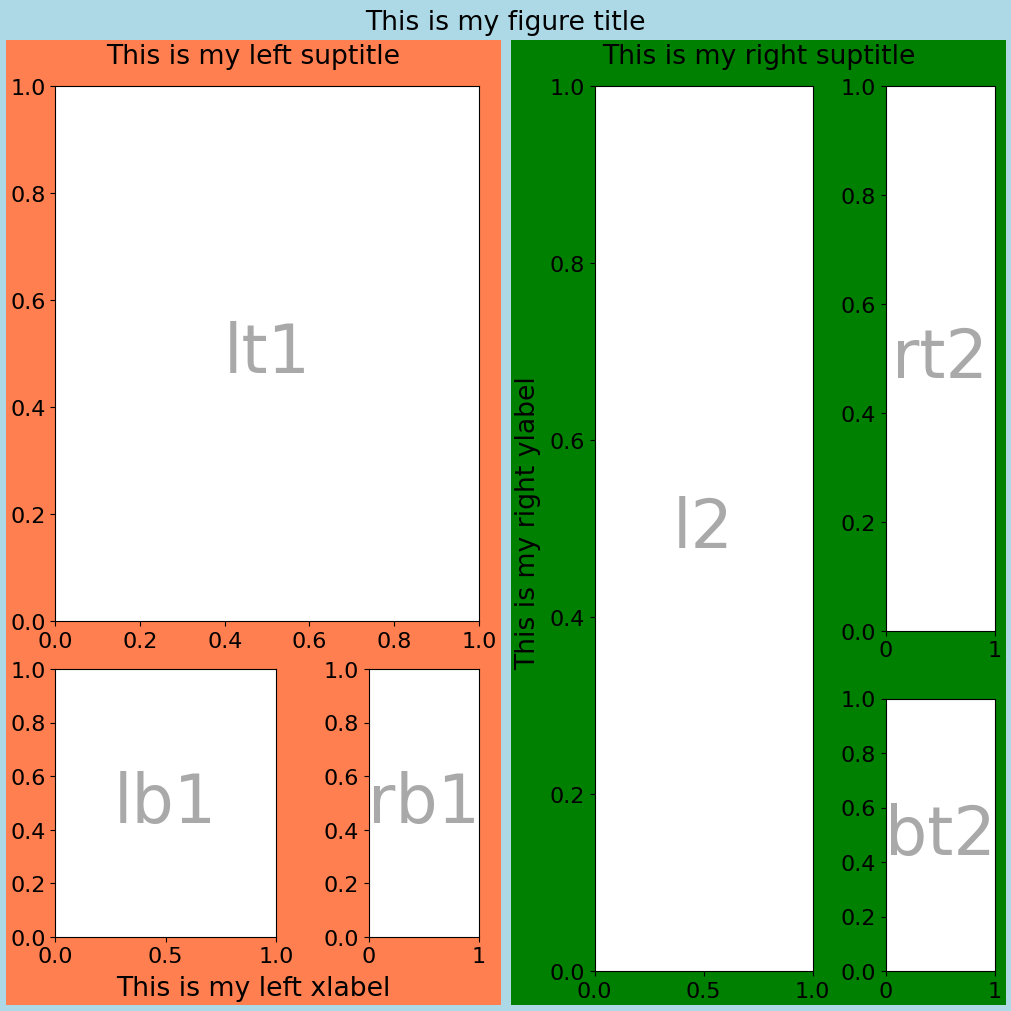

In [18]:
plotter.sf_dict["the_left_sub_figure"].set_facecolor("coral")
plotter.sf_dict["the_left_sub_figure"].suptitle("This is my left suptitle")
plotter.sf_dict["the_left_sub_figure"].supxlabel("This is my left xlabel")

plotter.sf_dict["the_right_sub_figure"].set_facecolor("g")
plotter.sf_dict["the_right_sub_figure"].suptitle("This is my right suptitle")
plotter.sf_dict["the_right_sub_figure"].supylabel("This is my right ylabel")

plotter.fig.set_facecolor("lightblue")
plotter.fig.suptitle("This is my figure title")
plotter.fig

## Some exceptions and limitations

It is not authorized to create plots with the same name on two different subfigures, otherwise, one or more will be missing in the `plotter.ax_dict`. An `Exception` is raised.

In [19]:
try:
    plotter = ngp.NestedGridPlotter(
        ngp.Figure(
            constrained_layout=True,  # Always use this to prevent overlappings
            figsize=(10, 10),
        ),
        builder=ngp.SubfigsBuilder(
            nrows=1,
            ncols=2,
            sub_builders={
                "the_left_sub_figure": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax11", "ax11"], ["ax12", "ax13"]],
                ),
                "the_right_sub_figure": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax12", "ax11"], ["ax12", "ax13"]],
                ),
            },
        ),
    )
except Exception as e:  # catch the exception
    print(e)
    plt.close()  # To avoid the image display

The names ['ax11', 'ax12', 'ax13'] have been used in more than one subfigures!


Also, when `sub_builders` are provided, the number of keys should match the number of subfigures (nrows * ncols). If the number of keys is different, an error is thrown.

In [20]:
try:
    plotter = ngp.NestedGridPlotter(
        ngp.Figure(
            constrained_layout=True,  # Always use this to prevent overlappings
            figsize=(10, 10),
        ),
        builder=ngp.SubfigsBuilder(
            nrows=1,
            ncols=2,
            sub_builders={
                "the_left_sub_figure": ngp.SubplotsMosaicBuilder(
                    mosaic=[["t-left", "t-left"], ["b-left", "b-right"]],
                ),
            },
        ),
    )
except Exception as e:  # catch the exception
    print(e)
    plt.close()  # To avoid the image display

Error while creating subfigures for fig, 1 builders have been provided, but there are 1 rows and 2 cols, i.e., 2 builders expected!


For the following tutorials, let's create a general function to generate such complex plot.

In [21]:
def gen_complex_example_fig():
    return ngp.NestedGridPlotter(
        ngp.Figure(
            constrained_layout=True,  # Always use this to prevent overlappings
            figsize=(15, 6),
        ),
        builder=ngp.SubfigsBuilder(
            nrows=1,
            ncols=2,
            sub_builders={
                "the_left_sub_figure": ngp.SubplotsMosaicBuilder(
                    mosaic=[["lt1", "lt1"], ["lb1", "rb1"]],
                    gridspec_kw=dict(height_ratios=[2, 1], width_ratios=[2, 1]),
                    sharey=False,
                ),
                "the_right_sub_figure": ngp.SubfigsBuilder(
                    nrows=1,
                    ncols=2,
                    width_ratios=[2, 1],
                    sub_builders={
                        "the_right_left_sub_figure": ngp.SubplotsMosaicBuilder(
                            mosaic=[["l2"]],
                        ),
                        "the_right_right_sub_figure": ngp.SubplotsMosaicBuilder(
                            mosaic=[["rt2"], ["rb2"]],
                            gridspec_kw=dict(height_ratios=[2, 1]),
                            sharey=False,
                        ),
                    },
                ),
            },
        ),
    )

## Legends management

Let's add some data to our plots!

In [22]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label=f"linear {ax_name}")  # Plot some data on the axes.
    ax.plot(x, x**2, label=f"quadratic {ax_name}")  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"cubic {ax_name}")  # ... and some more.

Add a legend to each subplots. Note that in addition to the `ax_name` all arguments to `plt.legend` are accepted.

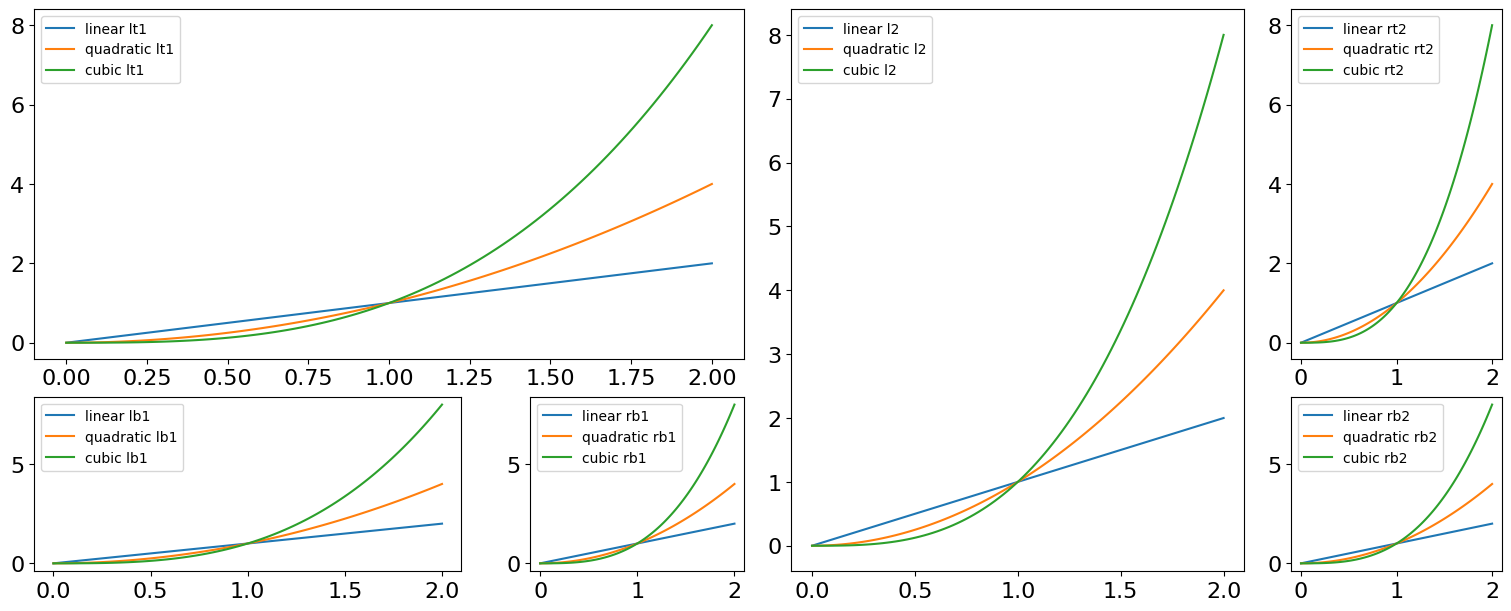

In [23]:
for ax_name in plotter.ax_dict.keys():
    plotter.add_axis_legend(ax_name, fontsize=10)
plotter.fig

However, it is sometimes convenient to gather all legends together in one "figure legend". Note that all arguments to `plt.legend` are accepted.

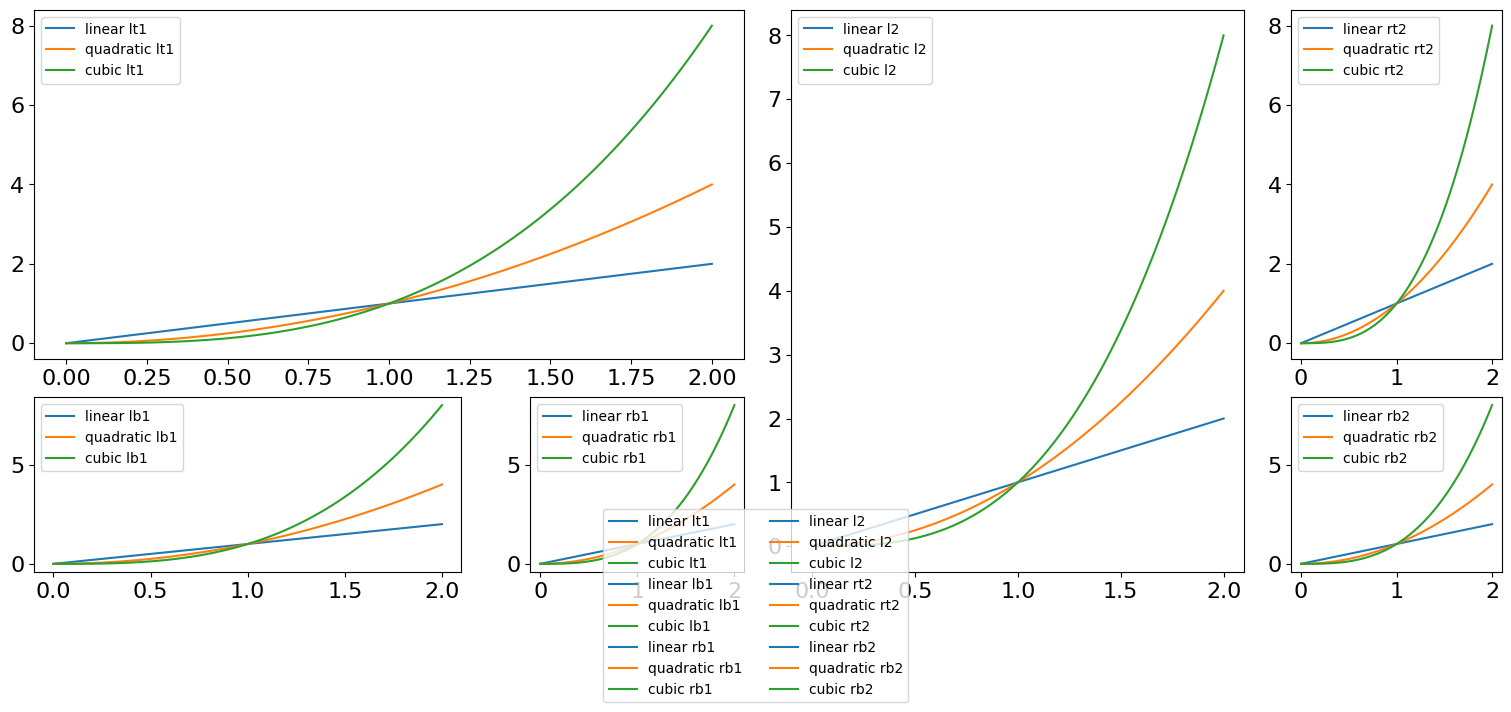

In [24]:
plotter.add_fig_legend(fontsize=10, ncol=2)
plotter.fig

The method gathers the identical labels found in the figure to avoid redundancy.

In [25]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label="the common linear legend item")  # Plot some data on the axes.
    ax.plot(
        x, x**2, label="the common quadratic legend item"
    )  # Plot more data on the axes...
    ax.plot(x, x**3, label="the common cubic legend item")  # ... and some more.

plotter.add_fig_legend(fontsize=10, bbox_y_shift=-0.03)

By default the legend is located in the bottom. It can be moved using `loc` which can take the values `left`, `right`, `top` and `bottom`. Note that it is systematically centered on the axis. However, the position can be overadjusted along the `x` and `y` axes using the keywords `bbox_x_shift` and `bbox_y_shift`. Note that the method accepts all additional `plt.legend` parameters except from `bbox_to_anchor` and `bbox_transform` which are determined automatically.

In [26]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label="the common linear legend item")  # Plot some data on the axes.
    ax.plot(
        x, x**2, label="the common quadratic legend item"
    )  # Plot more data on the axes...
    ax.plot(x, x**3, label="the common cubic legend item")  # ... and some more.


plotter.add_fig_legend(fontsize=10, loc="top", bbox_x_shift=0.35, bbox_y_shift=0.0)

Note: when using the built-in matplotlib `plotter.fig.legend()` several times, it results in x legend (stored as a list). With `plotter.add_fig_legend`, the legend list is systematically cleared and consequenlty, the figure can have only one legend at the same time.

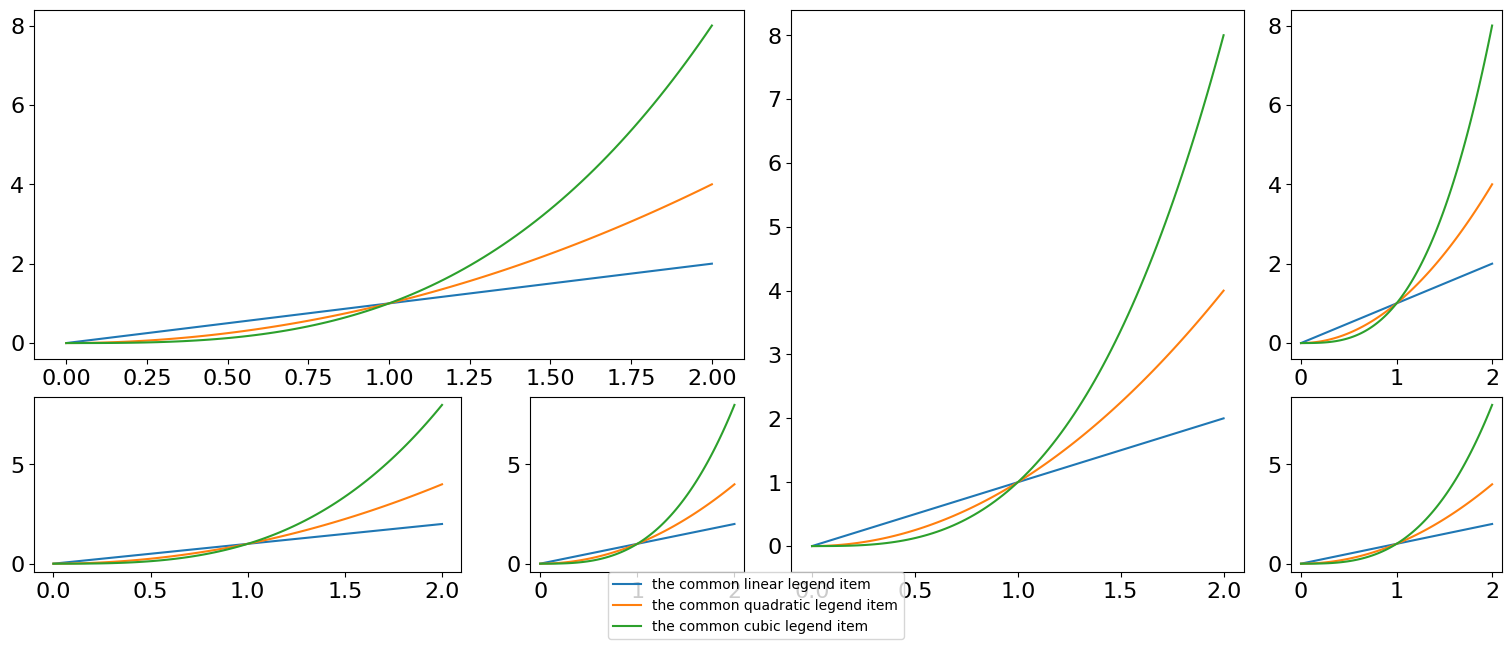

In [27]:
# Calling add_fig_legend again clear the previous legend
plotter.add_fig_legend(fontsize=10)
plotter.fig

When adding twin axes, they are automatically detected:

In [28]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    twin_ax = ax.twinx()
    twin_ax.plot(
        x, x * 5, c="r", label="curve on a twin axis"
    )  # Plot some data on the axes.
    ax.plot(x, x, label="the common linear legend item")  # Plot some data on the axes.
    ax.plot(
        x, x**2, label="the common quadratic legend item"
    )  # Plot more data on the axes...
    ax.plot(x, x**3, label="the common cubic legend item")  # ... and some more.

plotter.add_fig_legend(fontsize=10, ncol=2, bbox_y_shift=0.0)

It is also possible to add some labels for which there is no handles or labels. This is useful when plotting hline/vlines or spans for instance.


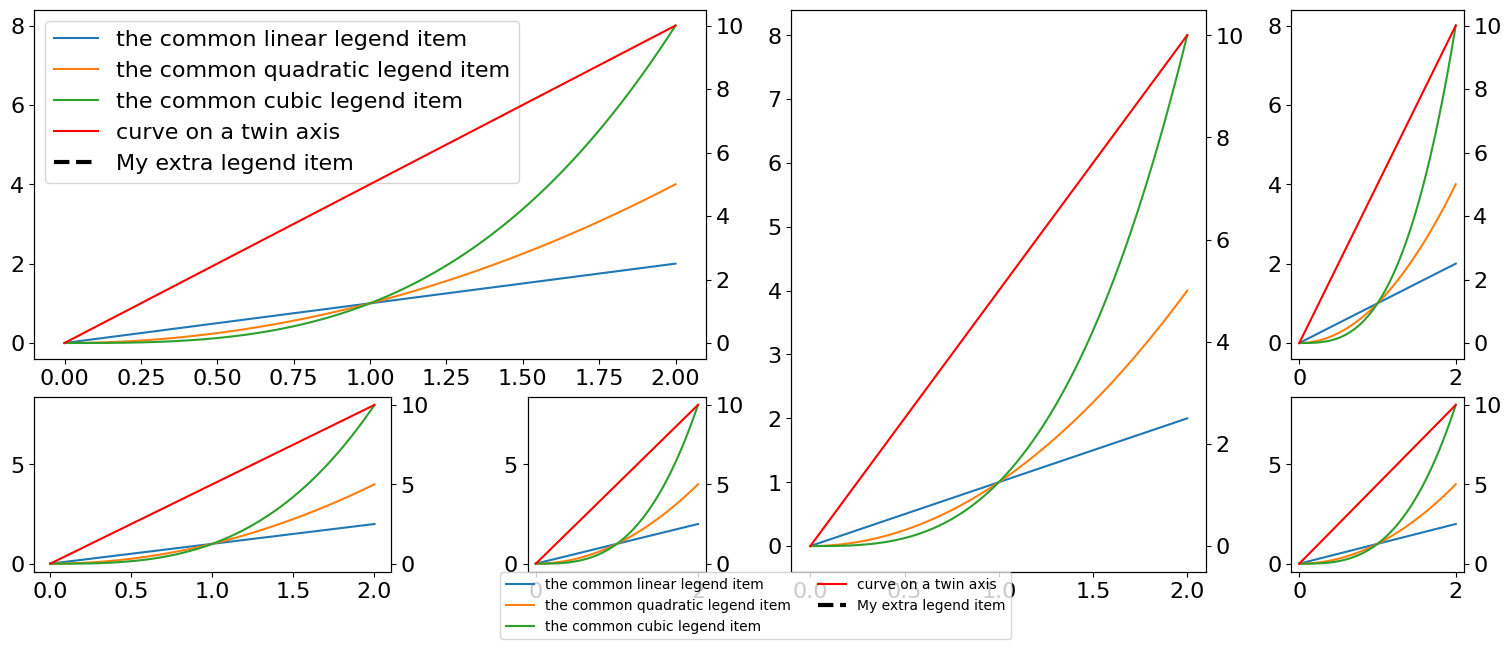

In [29]:
from matplotlib.lines import Line2D

handle = Line2D([0, 0], [0, 1], color="k", linewidth=3, linestyle="--")
plotter.add_extra_legend_item("lt1", handle, "My extra legend item")
plotter.add_axis_legend("lt1")
plotter.add_fig_legend(fontsize=10, ncol=2)
plotter.fig  # display the plot

In [30]:
plotter.get_subfigure_ax_dict("the_right_left_sub_figure")

{'l2': <Axes: label='l2'>}

In [31]:
plotter.get_subfigure_ax_dict("the_right_sub_figure")

{'l2': <Axes: label='l2'>,
 'rt2': <Axes: label='rt2'>,
 'rb2': <Axes: label='rb2'>}

It is possible to do the same for each subfigure with the same interface, simply by providing the subfigure `name`. Note that if the "full" figure and each subfigure can have only one legend, it is however possible to have it all at the same time (see example below), although it is not very useful.

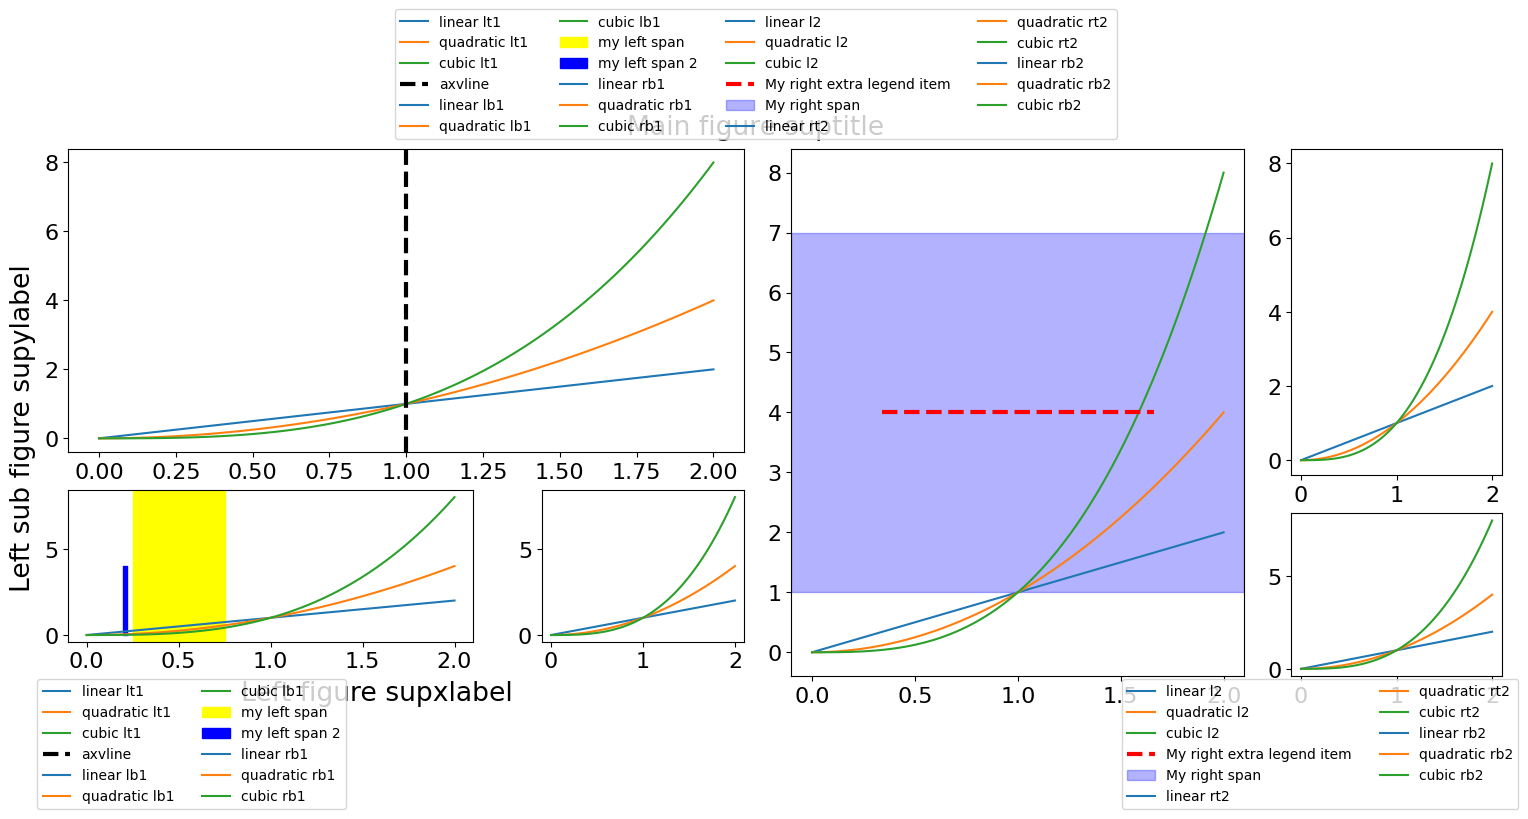

In [32]:
plotter = gen_complex_example_fig()
x = np.linspace(0, 2, 100)  # Sample data.
for ax_name, ax in plotter.ax_dict.items():
    ax.plot(x, x, label=f"linear {ax_name}")  # Plot some data on the axes.
    ax.plot(x, x**2, label=f"quadratic {ax_name}")  # Plot more data on the axes...
    ax.plot(x, x**3, label=f"cubic {ax_name}")  # ... and some more.

# Add some lines and spans and add it to the legend
handle = plotter.ax_dict["lt1"].axvline(
    x=1.0, color="k", linewidth=3, linestyle="--", label="axvline"
)

handle_v = plotter.ax_dict["lb1"].axvspan(
    xmin=0.25, xmax=0.75, color="yellow", label="my left span"
)

handle_fillbetweenx = plotter.ax_dict["lb1"].fill_betweenx(
    np.arange(5), x1=0.2, x2=0.22, color="blue", label="my left span 2"
)

handle = plotter.ax_dict["l2"].axhline(
    y=4.0, xmin=0.2, xmax=0.8, color="r", linewidth=3, linestyle="--"
)
plotter.add_extra_legend_item("l2", handle, "My right extra legend item")

handle = plotter.ax_dict["l2"].axhspan(ymin=1.0, ymax=7.0, color="blue", alpha=0.3)
plotter.add_extra_legend_item("l2", handle, "My right span")

# Add the legend to subfigures (we place it to the bottom)
plotter.add_fig_legend(
    name="the_left_sub_figure",
    fontsize=10,
    ncol=2,
    bbox_x_shift=-0.25,
    bbox_y_shift=-0.06,
)
plotter.add_fig_legend(
    name="the_right_sub_figure",
    fontsize=10,
    ncol=2,
    bbox_x_shift=+0.25,
    bbox_y_shift=-0.06,
)

# Add a title
plotter.fig.suptitle("Main figure suptitle")
plotter.sf_dict["the_left_sub_figure"].supxlabel("Left figure supxlabel")
plotter.sf_dict["the_left_sub_figure"].supylabel("Left sub figure supylabel")

# Add the "full" fig legend just for the example (we place it to the top)
_ = plotter.add_fig_legend(fontsize=10, loc="top", ncol=4, bbox_y_shift=+0.06)
plotter.fig

In [33]:
plotter.sf_dict.keys()

dict_keys(['the_left_sub_figure', 'the_right_sub_figure', 'the_right_left_sub_figure', 'the_right_right_sub_figure'])

## Saving with figure legends

A known issue is that the figure legend is not taken into account when scaling the figure box and the legends are cutoff. 
- For example, saving the last plotter using the basic matplotlib interface yields

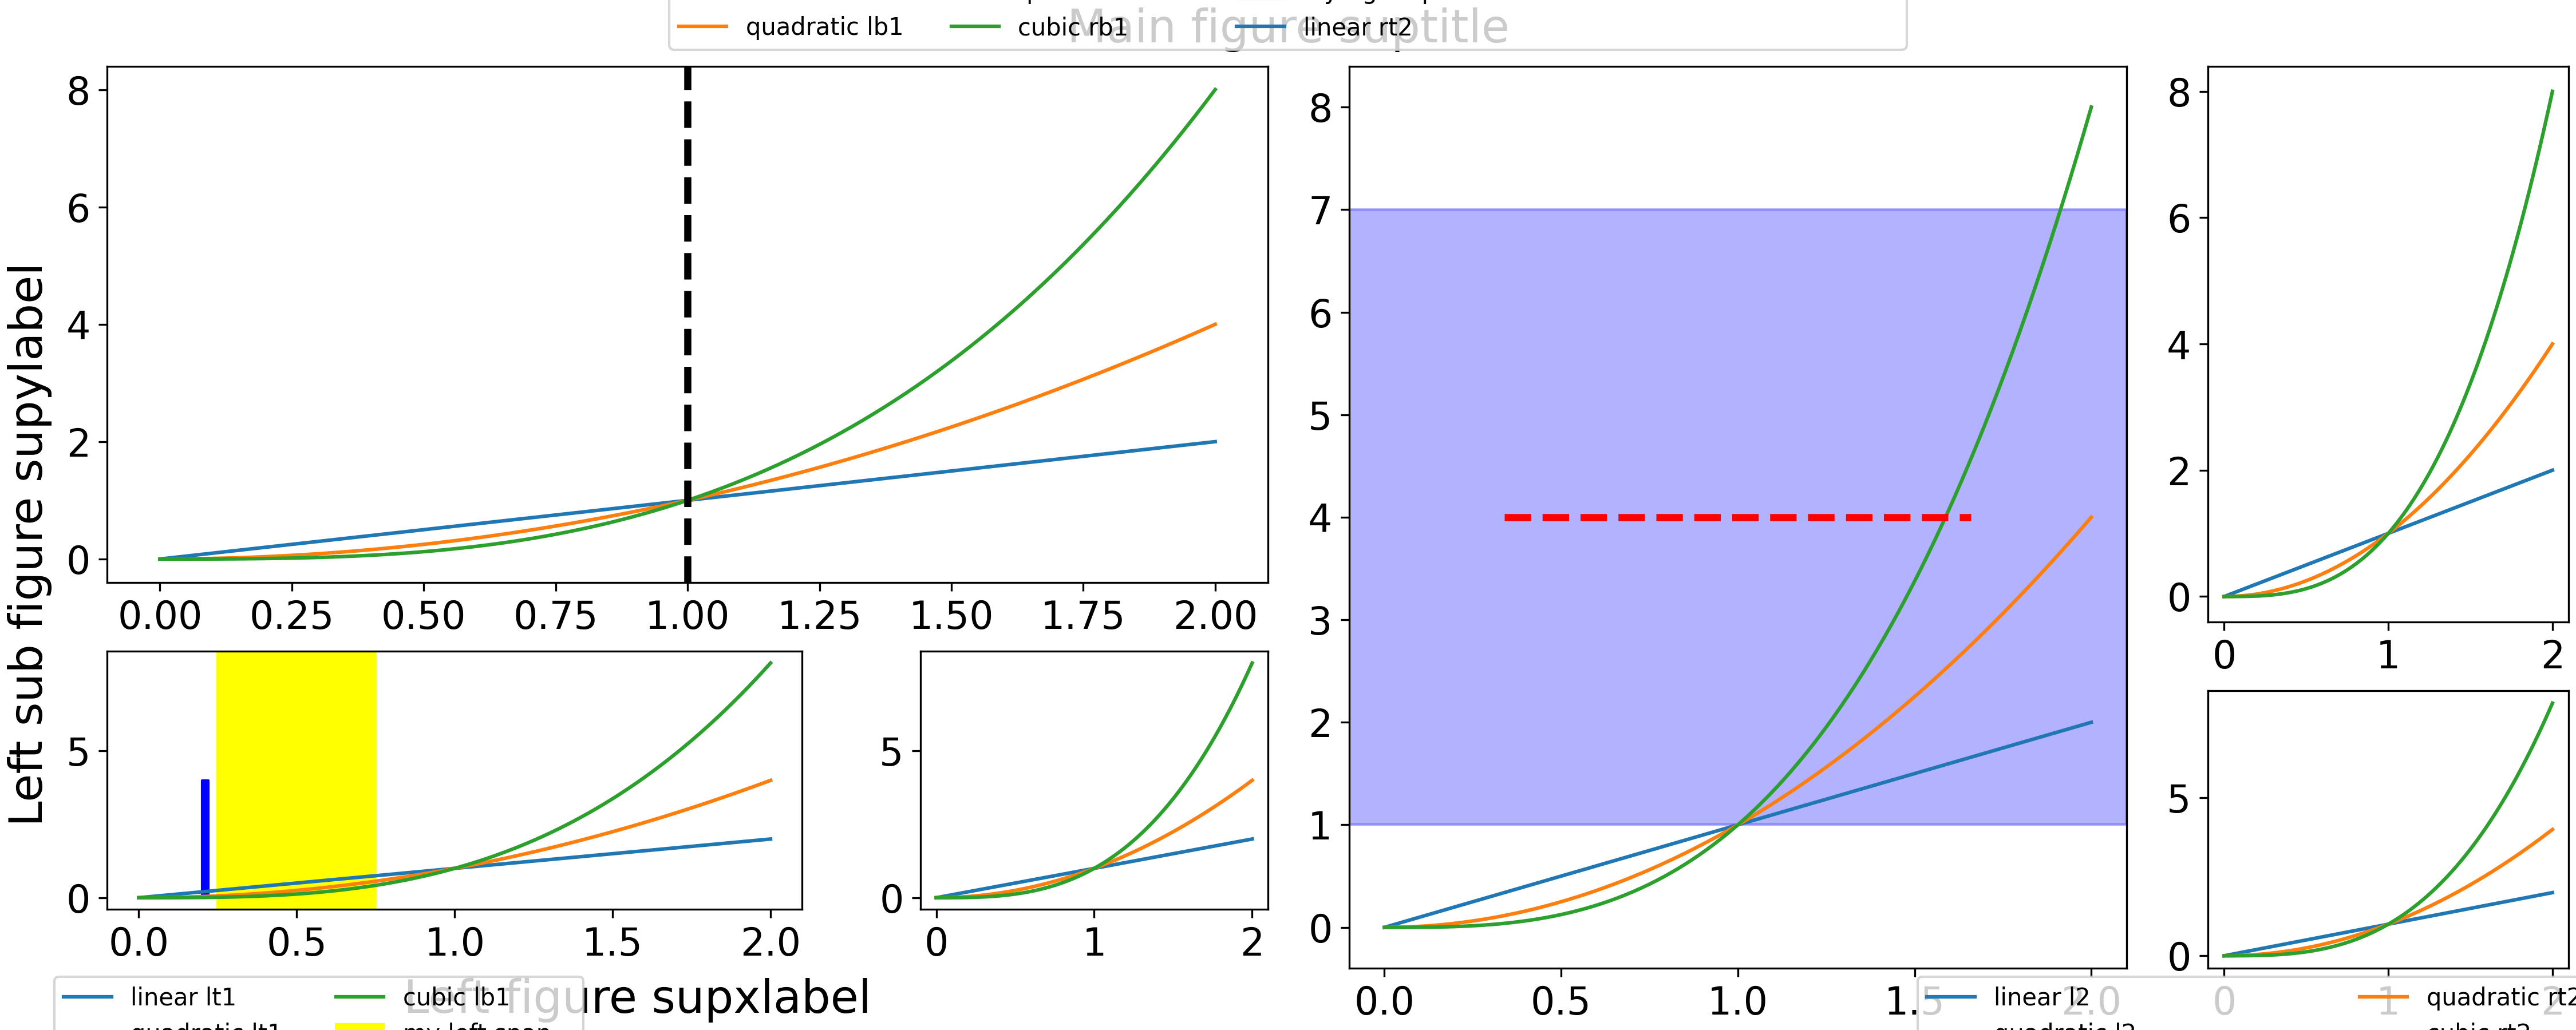

In [34]:
# create a temporary directory
tmpdir = tempfile.TemporaryDirectory()
# saving in the temp dir
save_path = Path(tmpdir.name).joinpath("tmp.png")
plotter.fig.savefig(save_path)
# showing the image
Image(save_path)

- Fortunately, nested_grid_plotter provides a solution. Warning: this works only if the `.add_fig_legend` interface has been used.

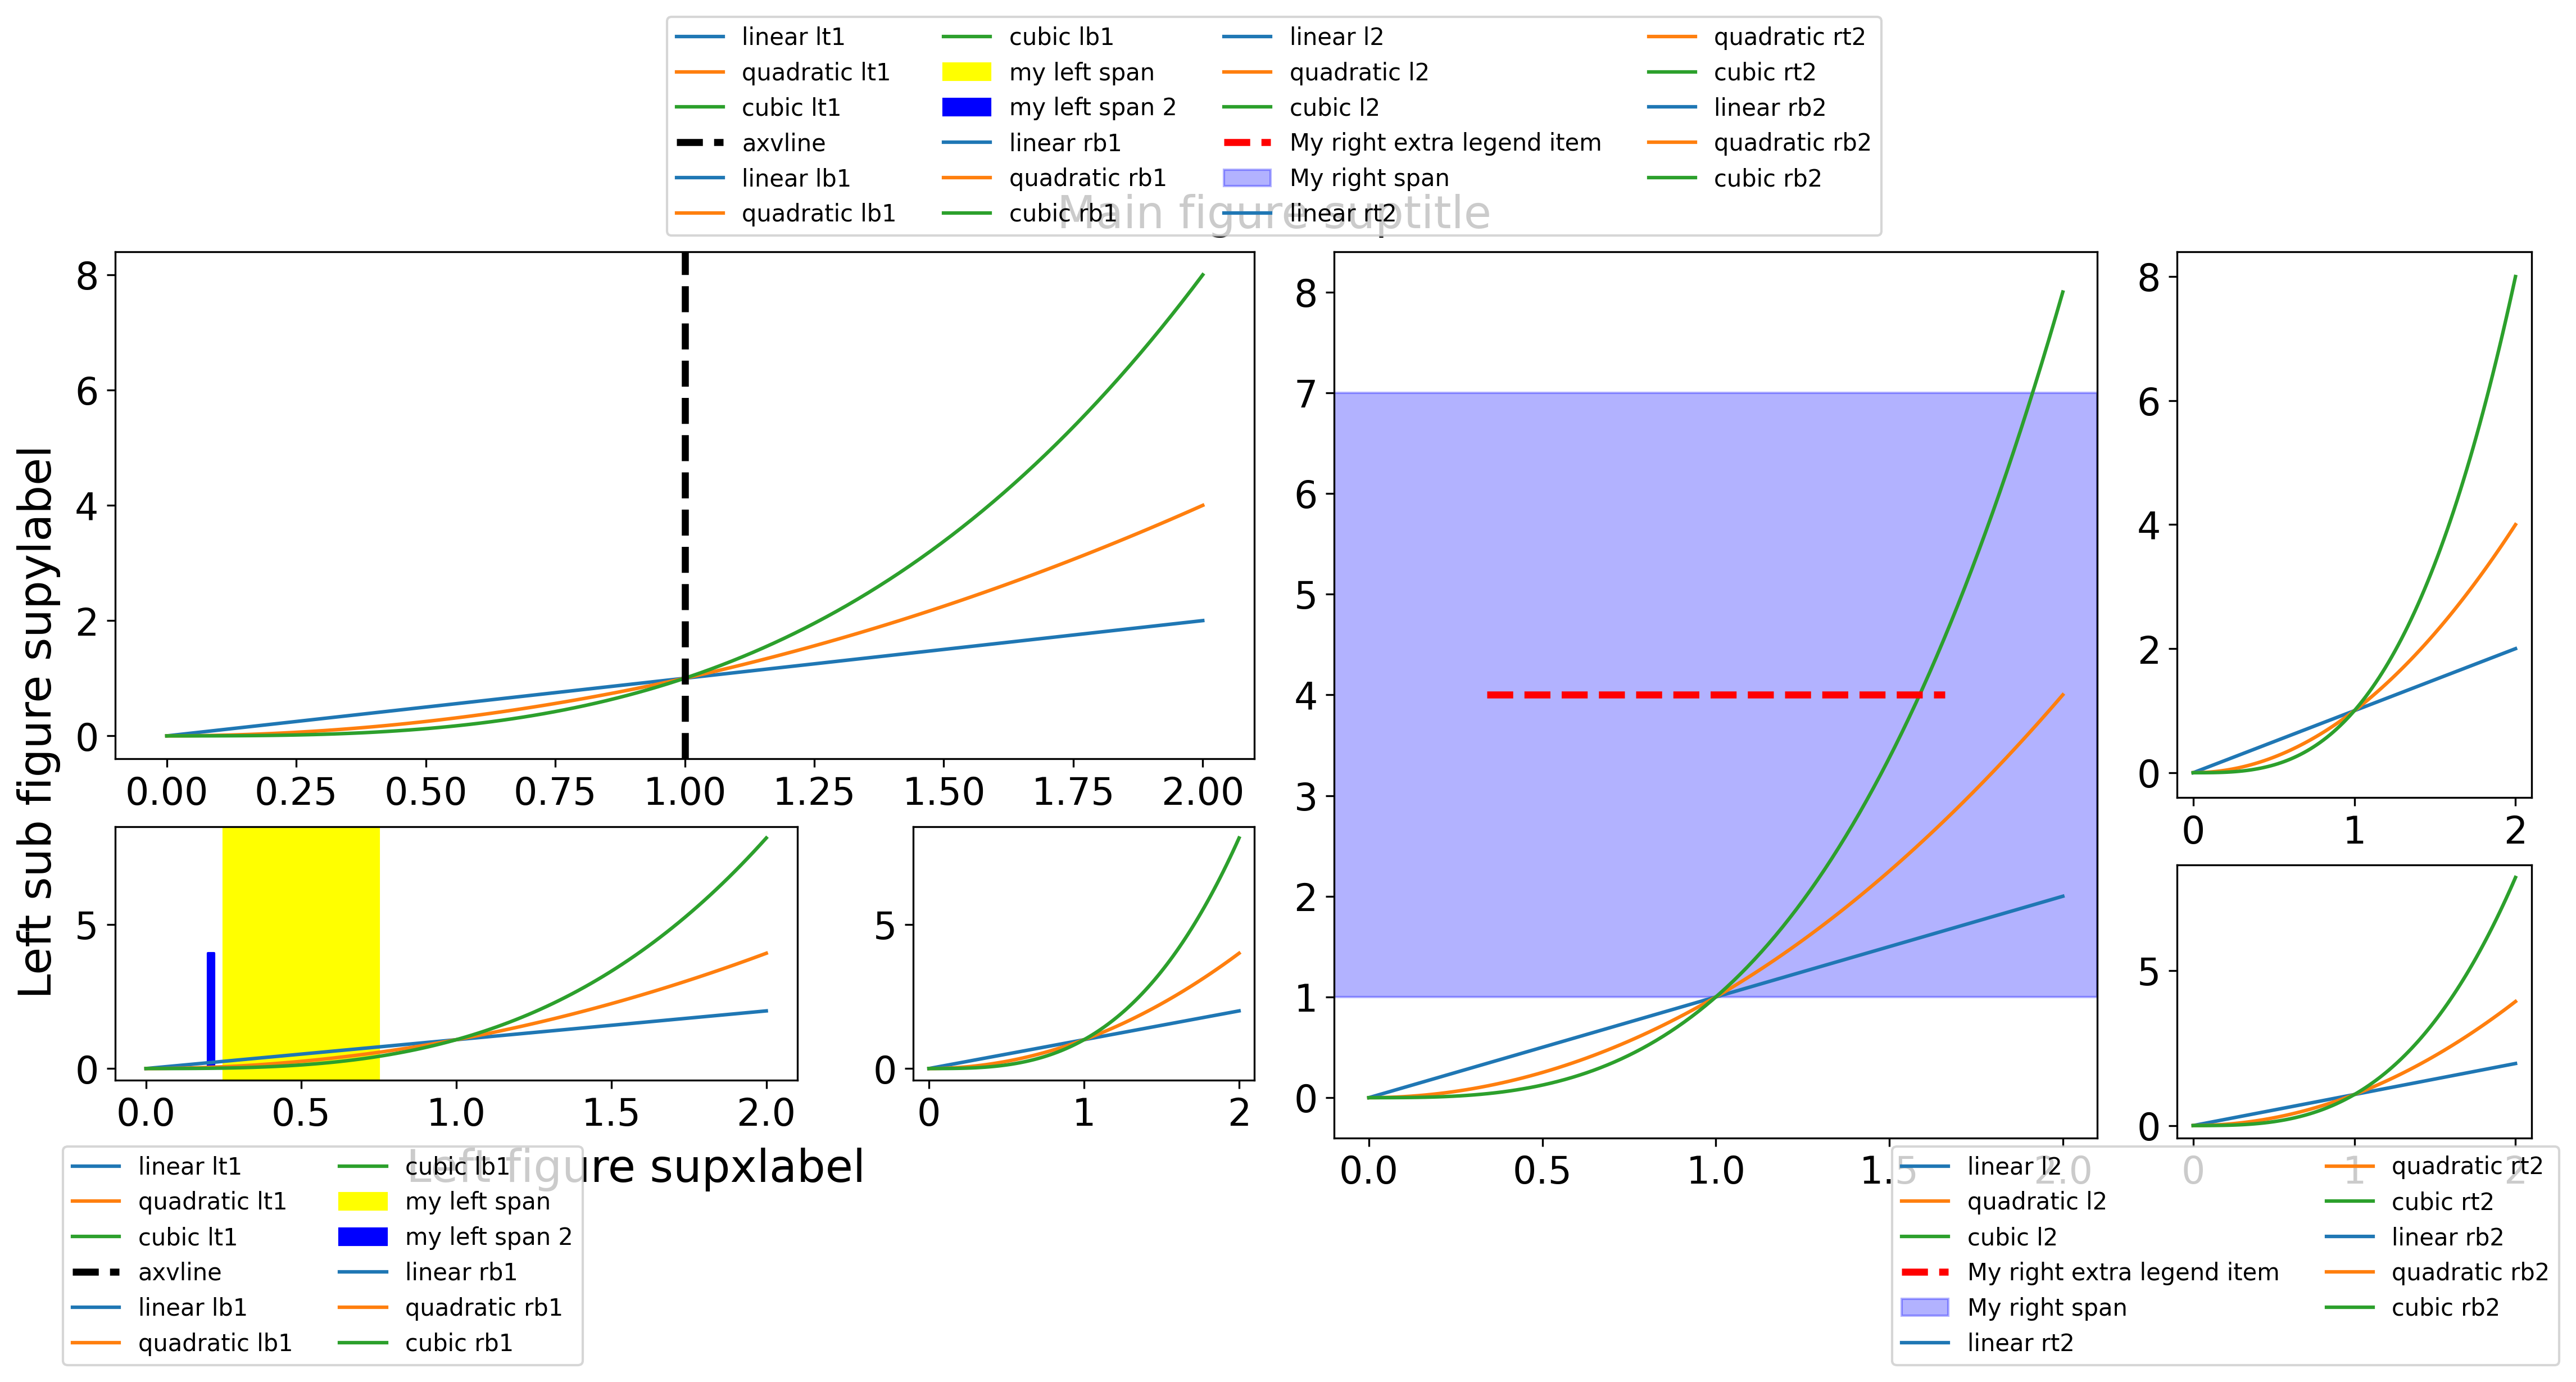

In [35]:
save_path = Path(tmpdir.name).joinpath("tmp_correct.png")
plotter.savefig(save_path)
# showing the image
Image(save_path)

## Clear axes and legends

It is possible to clear axes, legends and extra legend items with a single command. This becomes very useful when a plotter is used in series with different data.

- To clear a specific fig legend

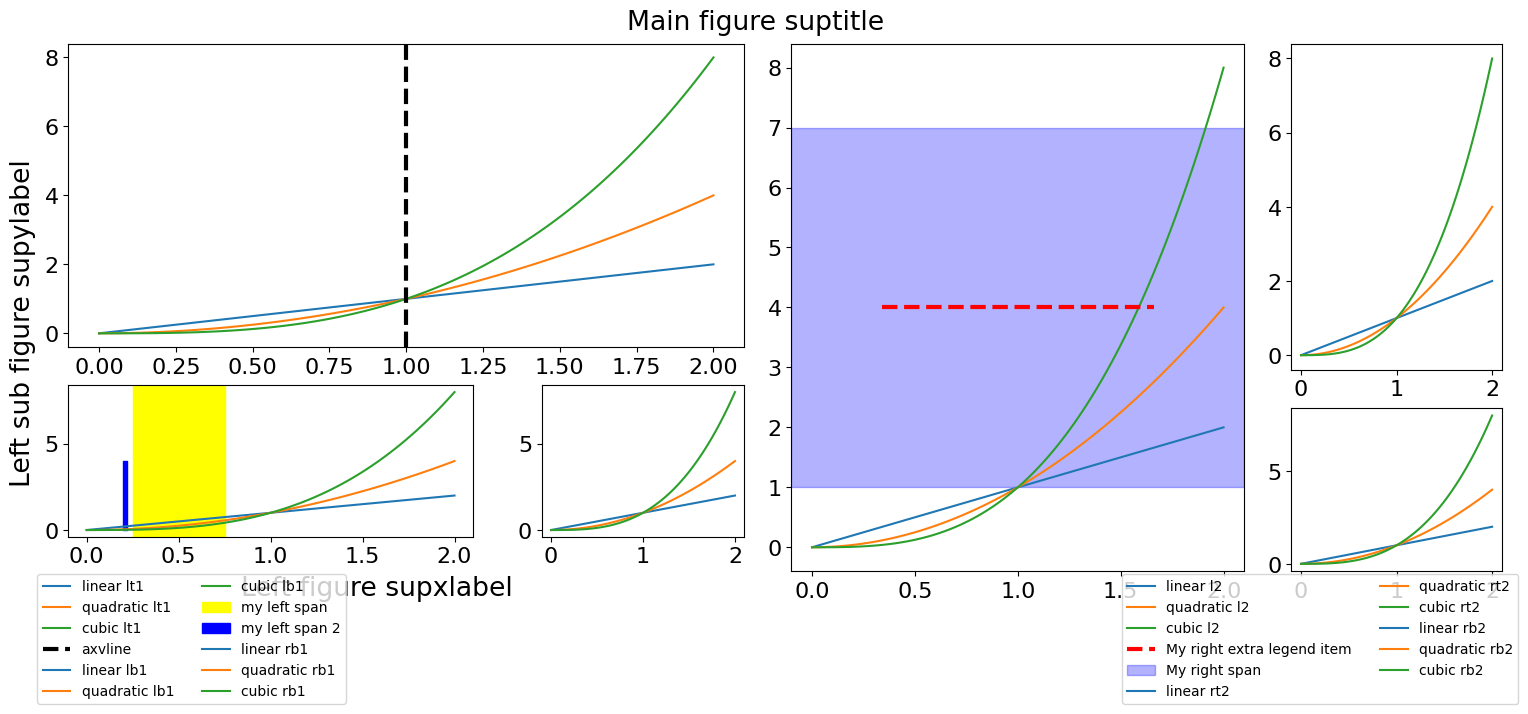

In [36]:
plotter2 = copy.deepcopy(plotter)
plotter2.fig.legends.clear()
plotter2.fig

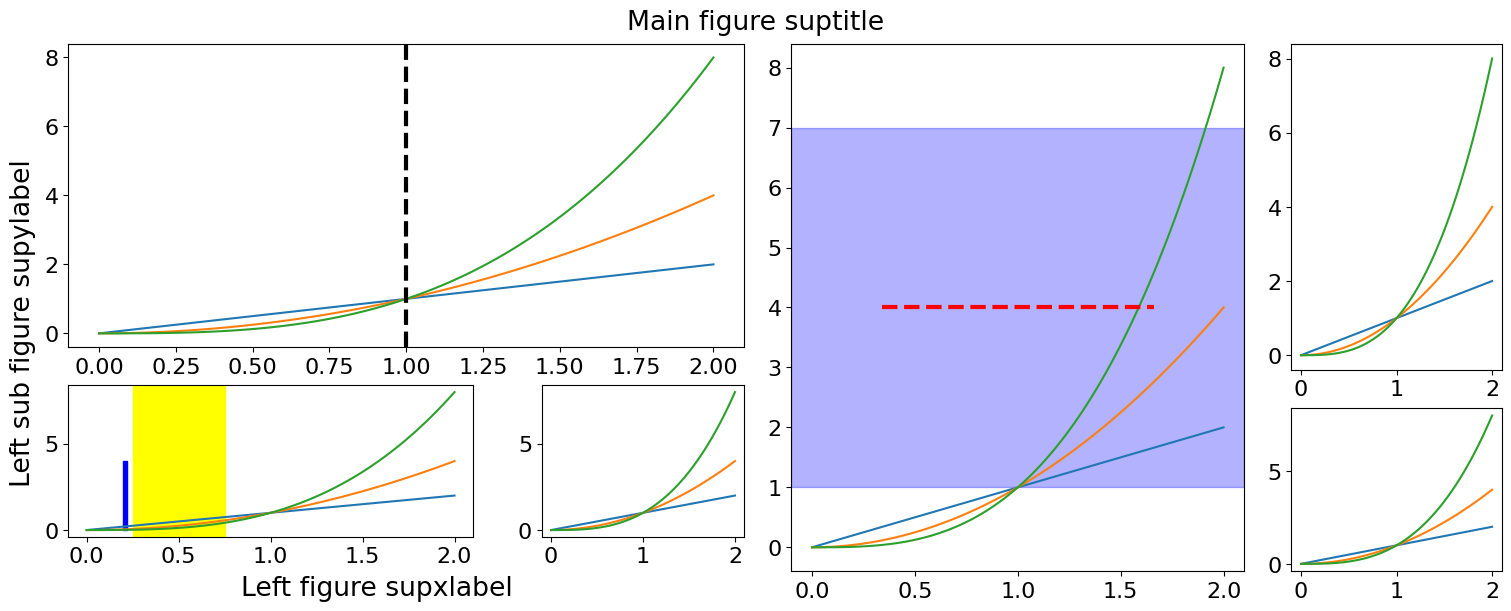

In [37]:
plotter2 = copy.deepcopy(plotter)
plotter2.clear_fig_legends()
plotter2.fig

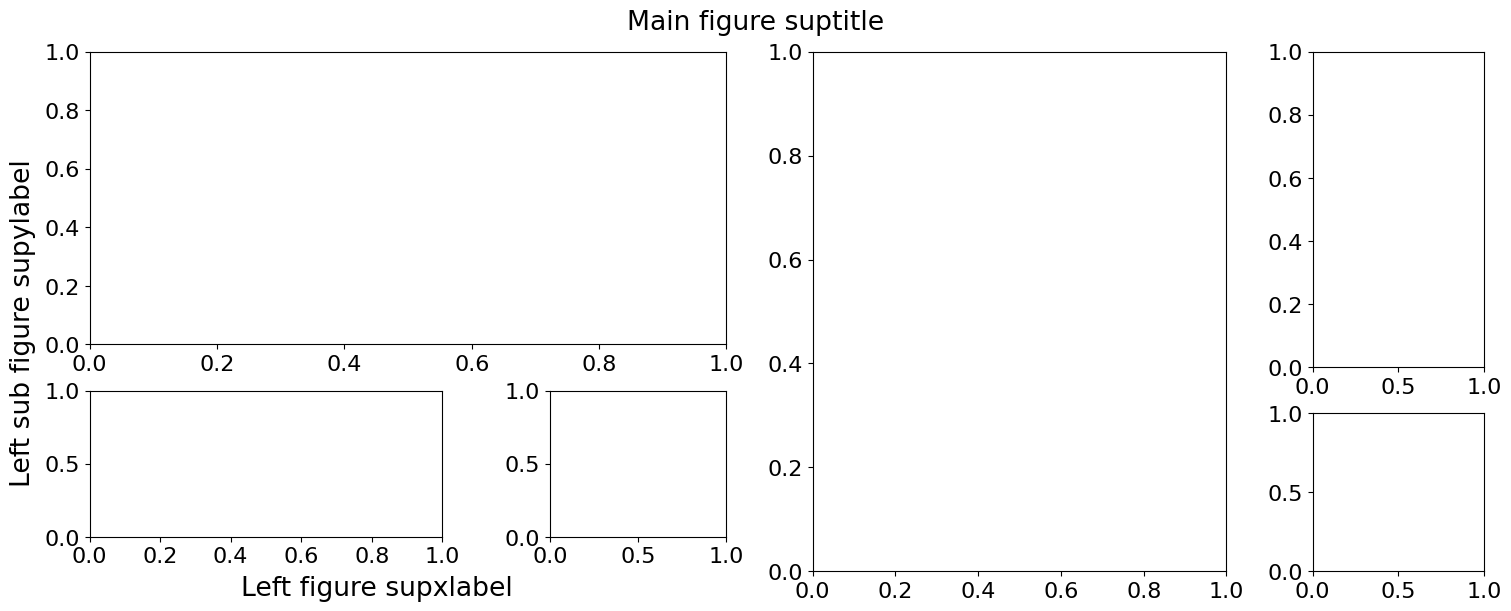

In [38]:
plotter3 = copy.deepcopy(plotter)
plotter3.clear_all_axes()
plotter3.fig

## Legend overlapping: add fig legend vs. add_axis legend...

L'un des problème avec l'ajout de légende au niveau des subfigures est que la légende n'appartient à aucun axe. Le solver dernière "constrained_layout" est alors incapable de détemriner quel axe réduire pour éviter les chevauchements. Dans ce cas, il vaut mieux ajouter des légendes aux axes. Voici un examples avec 4 axes répartis dans 3 subfigures. Une sous-figure à gauche contenant deux axes, et une sous figure à droite contenant elle même deux sous figures avec chacune un axes.
Dans le cas de gauche... OK
Dans le cas de droite, ce sont deux sous-figures qui sont ajoutées NOK.

In [39]:
def gen_complex_example_fig2():
    return ngp.NestedGridPlotter(
        ngp.Figure(
            constrained_layout=True,  # Always use this to prevent overlappings
            figsize=(20, 10),
        ),
        builder=ngp.SubfigsBuilder(
            nrows=2,
            ncols=4,
            hspace=0.0,
            width_ratios=[1, 1, 1, 2],
            sub_builders={
                "sf1-1": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax1-1"]],
                ),
                "sf1-2": ngp.SubplotsMosaicBuilder(mosaic=[["ax1-2"]]),
                "sf1-3": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax1-3"]],
                ),
                "sf1-4": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax1-4"]],
                ),
                "sf2-1": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax2-1"]],
                ),
                "sf2-2": ngp.SubplotsMosaicBuilder(mosaic=[["ax2-2"]]),
                "sf2-3": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax2-3"]],
                ),
                "sf2-4": ngp.SubplotsMosaicBuilder(
                    mosaic=[["ax2-4"]],
                ),
            },
        ),
    )

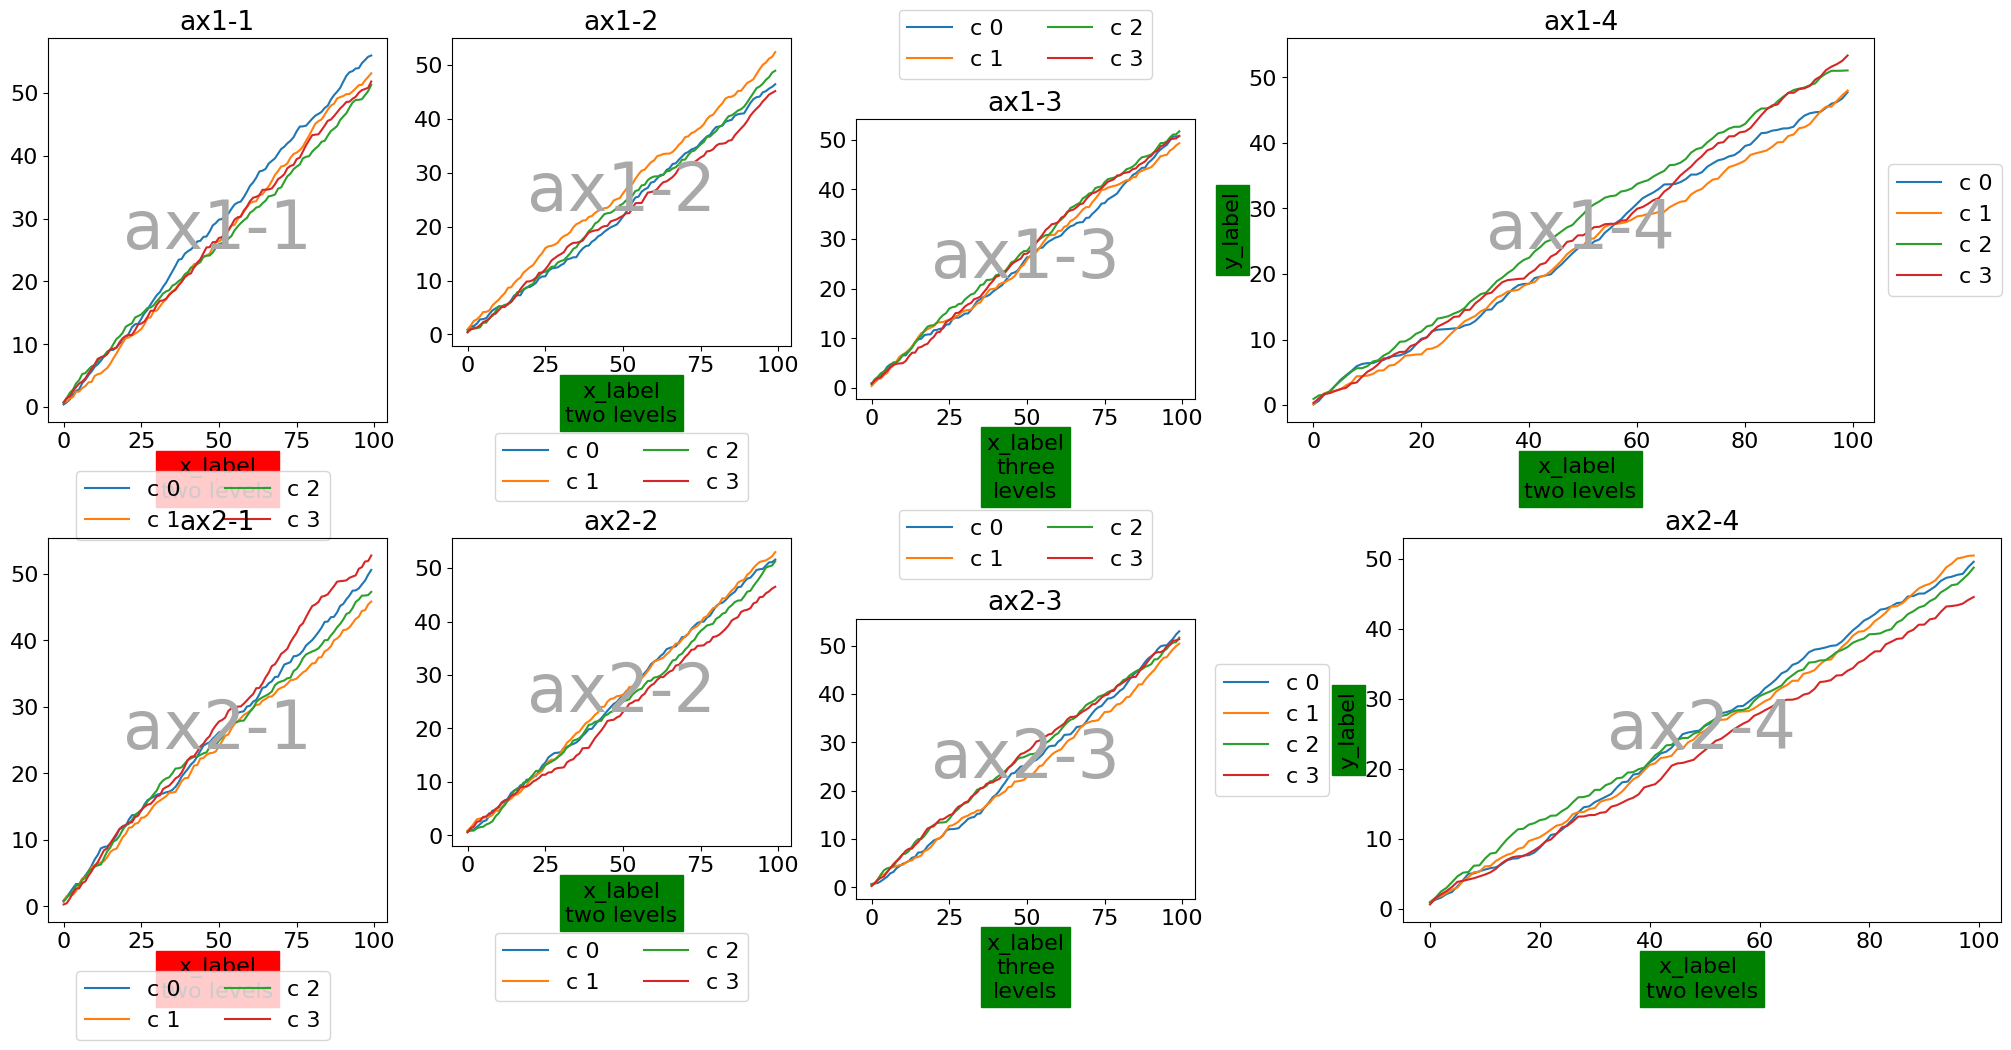

In [40]:
plotter = gen_complex_example_fig2()
plotter.identify_axes()
x = np.arange(100)
for ax_name, ax in plotter.ax_dict.items():
    for i in range(4):
        ax.plot(x, np.cumsum(np.random.random(x.size)), label=f"c {i}")
    ax.set_title(ax_name)

legends = []

# Case 1: for lt and lb we add subfigure legend (we use corresponding subfigures)
for ax_name, sf_name in zip(["ax1-1", "ax2-1"], ["sf1-1", "sf2-1"]):
    plotter.ax_dict[ax_name].set_facecolor("none")
    plotter.ax_dict[ax_name].set_xlabel("x_label\ntwo levels", bbox={"color": "red"})
    plotter.add_fig_legend(sf_name, ncols=2)

# Case 2 for rt and rb we add axis legend
for ax_name in ["ax1-2", "ax2-2"]:
    plotter.ax_dict[ax_name].set_facecolor("none")
    plotter.ax_dict[ax_name].set_xlabel("x_label\ntwo levels", bbox={"color": "green"})
    legends.append(plotter.add_axis_legend_outside_frame(ax_name, ncols=2))

for ax_name in ["ax1-3", "ax2-3"]:
    plotter.ax_dict[ax_name].set_facecolor("none")
    plotter.ax_dict[ax_name].set_xlabel(
        "x_label\nthree\nlevels", bbox={"color": "green"}
    )
    legends.append(plotter.add_axis_legend_outside_frame(ax_name, ncols=2, loc="top"))

for ax_name, loc in zip(["ax1-4", "ax2-4"], ["right", "left"]):
    plotter.ax_dict[ax_name].set_facecolor("none")
    plotter.ax_dict[ax_name].set_xlabel("x_label \ntwo levels", bbox={"color": "green"})
    plotter.ax_dict[ax_name].set_ylabel("y_label", bbox={"color": "green"})
    legends.append(plotter.add_axis_legend_outside_frame(ax_name, ncols=1, loc=loc))

# for sf_name, subfig in plotter.grouped_sf_dict.items():
#     plotter.add_fig_legend(sf_name, ncols=2, bbox_y_shift=-0.1)
plotter.fig